<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/may_revisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")
install.packages("dplyr")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpMAz5Ex/remotes14e158c7ef5/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpMAz5Ex/file14e3d0f17b5/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
library(terra)

terra 1.7.78


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset




In [2]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)
# library(gdalUtils)

drive_auth(use_oob = TRUE, cache = FALSE)

Loading required package: sp

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘fasterize’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.app

Enter authorization code: eyJjb2RlIjoiNC8wQWRMSXJZZlFwdWJ2ajNkX2tmbEt2azNOUnJVdkF2N19FN2hXT2RCSl9ySURyTkprRkNkMDU3SjFFaldtd1I3X2pwV3kzUSIsInN0YXRlIjoiMzMyZDBiMzYxZjdiMzU4YjU5ODMzNTcyMzlhZGY4NDYifQ==


In [3]:
dir.create("/content/imagery")
dir.create("/content/imagery/planet")
dir.create("/content/imagery/planet/dem")
dir.create("/content/imagery/planet/2019")
dir.create("/content/imagery/planet/2020")
dir.create("/content/aoi")

In [9]:
# haleiwa 2019
# https://drive.google.com/file/d/10HjhzOQFdb8_Ozri8eRAvq1eyrGLcyXZ/view?usp=drive_link
drive_download(file = as_id('10HjhzOQFdb8_Ozri8eRAvq1eyrGLcyXZ'), path =  '/content/imagery/planet/2019/haleiwa_2019.tif', overwrite = FALSE)

# kahuku 2019
# https://drive.google.com/file/d/17q83cY0iQ9gryUD-TXvzebRKF0sFtF9t/view?usp=drive_link
drive_download(file = as_id('17q83cY0iQ9gryUD-TXvzebRKF0sFtF9t'), path =  '/content/imagery/planet/2019/kahuku_2019.tif', overwrite = FALSE)

# kawainui 2019
# https://drive.google.com/file/d/13xrSaphAb7aj4J_57g7o7z494RmKeQmi/view?usp=drive_link
drive_download(file = as_id('13xrSaphAb7aj4J_57g7o7z494RmKeQmi'), path =  '/content/imagery/planet/2019/kawainui_2019.tif', overwrite = FALSE)

File downloaded:

• haleiwa_2019-01-11.tif <id: 10HjhzOQFdb8_Ozri8eRAvq1eyrGLcyXZ>

Saved locally as:

• /content/imagery/planet/2019/haleiwa_2019.tif

File downloaded:

• kahuku_2019-03-15.tif <id: 17q83cY0iQ9gryUD-TXvzebRKF0sFtF9t>

Saved locally as:

• /content/imagery/planet/2019/kahuku_2019.tif

File downloaded:

• kawainui_2019-01-25.tif <id: 13xrSaphAb7aj4J_57g7o7z494RmKeQmi>

Saved locally as:

• /content/imagery/planet/2019/kawainui_2019.tif



In [8]:
# haleiwa 2020
# https://drive.google.com/file/d/129g3gFz-yC0lyYMkQRvlHKBBqqGobRBC/view?usp=drive_link
drive_download(file = as_id('129g3gFz-yC0lyYMkQRvlHKBBqqGobRBC'), path =  '/content/imagery/planet/2020/haleiwa_2020.tif', overwrite = FALSE)

# kahuku 2020
# https://drive.google.com/file/d/17LOIhIw_EN6IhH2LfoPMhr_V53jG4FzC/view?usp=drive_link
drive_download(file = as_id('17LOIhIw_EN6IhH2LfoPMhr_V53jG4FzC'), path =  '/content/imagery/planet/2020/kahuku_2020.tif', overwrite = FALSE)

# kawainui 2020
# https://drive.google.com/file/d/1CVZoBRRpQfI1dVFiiz5z8S9A9-Zami3P/view?usp=drive_link
drive_download(file = as_id('1CVZoBRRpQfI1dVFiiz5z8S9A9-Zami3P'), path =  '/content/imagery/planet/2020/kawainui_2020.tif', overwrite = FALSE)

File downloaded:

• haleiwa_2020-01-21.tif <id: 129g3gFz-yC0lyYMkQRvlHKBBqqGobRBC>

Saved locally as:

• /content/imagery/planet/2020/haleiwa_2020.tif

File downloaded:

• kahuku_2020-01-22.tif <id: 17LOIhIw_EN6IhH2LfoPMhr_V53jG4FzC>

Saved locally as:

• /content/imagery/planet/2020/kahuku_2020.tif

File downloaded:

• kawainui_2020-01-24.tif <id: 1CVZoBRRpQfI1dVFiiz5z8S9A9-Zami3P>

Saved locally as:

• /content/imagery/planet/2020/kawainui_2020.tif



In [10]:
# oahu dem
# https://drive.google.com/file/d/19_F1B-d5trv8iwBDBNKcLCWa19vnFvGI/view?usp=drive_link
drive_download(file = as_id('10HjhzOQFdb8_Ozri8eRAvq1eyrGLcyXZ'), path =  '/content/imagery/planet/dem/oahu.tif', overwrite = FALSE)

File downloaded:

• haleiwa_2019-01-11.tif <id: 10HjhzOQFdb8_Ozri8eRAvq1eyrGLcyXZ>

Saved locally as:

• /content/imagery/planet/dem/oahu.tif



In [4]:
# # Load Planet 2020 utm4 select files
# # https://drive.google.com/drive/folders/1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64?usp=drive_link
# jp_folder = "1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64"
# folder_id = drive_get(as_id(jp_folder)) # get folder ID
# print(folder_id) #print folder ID

# # Find files in the folder
# files = drive_ls(folder_id)

# # Loop through directories and download files inside them
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/imagery/planet/2020/utm4/', i_dir$name[1])
#       )
#     })
#   }

# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 2020_select 1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64 <named list [34]>
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2020/utm4/2020_vrt_march27_update.vrt.
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2020/utm4/2020_select_vrt.vrt.
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2020/utm4/kahuku_2020-01-22.tif.
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2020/utm4/wailua_opaekaa_2020-01-24.tif.
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2020/utm4/waihee_2020-01-24.tif.
Error in curl::curl_fetch_disk(url, x$path, handle = han

In [5]:
# Load Planet 2019 utm4 select files
# https://drive.google.com/drive/folders/1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc?usp=drive_link
jp_folder = "1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2019/utm4/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 2019_select 1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc <named list [34]>
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2019/utm4/2019_vrt_march27_update.vrt.
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2019/utm4/2019_select_vrt.vrt.
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2019/utm4/wailua_opaekaa_2019-01-22.tif.
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2019/utm4/waihee_2019-01-06.tif.
Error in curl::curl_fetch_disk(url, x$path, handle = handle) : 
  Failed to open file /content/imagery/planet/2019/utm4/pearl_harbor_2019-02-20.tif.
Error in curl::curl_fetch_disk(url, x$path, handle

In [6]:
# Load aoi 384 select for my 3 aois
# https://drive.google.com/drive/folders/1ci_EmlFe72D2rPFhkFSqyOhPvWAmAmjA?usp=drive_link
jp_folder = "1ci_EmlFe72D2rPFhkFSqyOhPvWAmAmjA"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/aoi/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name           id                                drive_resource   
  <chr>          <drv_id>                          <list>           
1 aoi_384_select 1ci_EmlFe72D2rPFhkFSqyOhPvWAmAmjA <named list [34]>


File downloaded:

• 384-select-kawainui.shx <id: 1kgzTJHW3m1QkJZMijLTcGWe0uuNjsHCa>

Saved locally as:

• /content/aoi/384-select-kawainui.shx

File downloaded:

• 384-select-haleiwa.dbf <id: 1ausosIIPh6AVByeSguMgMonIJqB4YbOB>

Saved locally as:

• /content/aoi/384-select-haleiwa.dbf

File downloaded:

• 384-select-kawainui.shp <id: 1loPJLRG2PydnvrJ27URB2ch5hNFbMQnw>

Saved locally as:

• /content/aoi/384-select-kawainui.shp

File downloaded:

• 384-select-kawainui.prj <id: 13tDi7WfB5JGkWnoE5M1owVxpRwWrc9c2>

Saved locally as:

• /content/aoi/384-select-kawainui.prj

File downloaded:

• 384-select-kahuku.shx <id: 1lrBfz2m4tryLWMTQ0xfTCUsytSoX6BaH>

Saved locally as:

• /content/aoi/384-select-kahuku.shx

File downloaded:

• 384-select-kahuku.dbf <id: 1cT2EuHjg7IxOvJc0nnBZOAeigZsR10pi>

Saved locally as:

• /content/aoi/384-select-kahuku.dbf

File downloaded:

• 384-select-haleiwa.shp <id: 13TwaY5uSu6iUjC8jFBgan8We6zLy9TnI>

Saved locally as:

• /content/aoi/384-select-haleiwa.shp

File

In [68]:
# read 2019 rasters
haleiwa_2019 <- stack("/content/imagery/planet/2019/haleiwa_2019.tif") # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs
kahuku_2019 <- stack("/content/imagery/planet/2019/kahuku_2019.tif") # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs
kawainui_2019 <- stack("/content/imagery/planet/2019/kawainui_2019.tif") # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs
haleiwa_2019
kahuku_2019
kawainui_2019

class      : RasterStack 
dimensions : 2454, 1884, 4623336, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 590409, 596061, 2383569, 2390931  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : haleiwa_2019_1, haleiwa_2019_2, haleiwa_2019_3, haleiwa_2019_4 


class      : RasterStack 
dimensions : 1522, 2231, 3395582, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 602661, 609354, 2397288, 2401854  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : kahuku_2019_1, kahuku_2019_2, kahuku_2019_3, kahuku_2019_4 


class      : RasterStack 
dimensions : 2290, 1983, 4541070, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 625875, 631824, 2361765, 2368635  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : kawainui_2019_1, kawainui_2019_2, kawainui_2019_3, kawainui_2019_4 


In [71]:
haleiwa_2019 %>% extent

class      : Extent 
xmin       : 590409 
xmax       : 596061 
ymin       : 2383569 
ymax       : 2390931 

In [69]:
# read 2020 rasters
haleiwa_2020 <- stack("/content/imagery/planet/2020/haleiwa_2020.tif") # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs
kahuku_2020 <- stack("/content/imagery/planet/2020/kahuku_2020.tif") # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs
kawainui_2020 <- stack("/content/imagery/planet/2020/kawainui_2020.tif") # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs
haleiwa_2020
kahuku_2020
kawainui_2020

class      : RasterStack 
dimensions : 2454, 1884, 4623336, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 590409, 596061, 2383569, 2390931  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : haleiwa_2020_1, haleiwa_2020_2, haleiwa_2020_3, haleiwa_2020_4 


class      : RasterStack 
dimensions : 1522, 2231, 3395582, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 602661, 609354, 2397288, 2401854  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : kahuku_2020_1, kahuku_2020_2, kahuku_2020_3, kahuku_2020_4 


class      : RasterStack 
dimensions : 2290, 1983, 4541070, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 625875, 631824, 2361765, 2368635  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : kawainui_2020_1, kawainui_2020_2, kawainui_2020_3, kawainui_2020_4 


class      : RasterStack 
dimensions : 2454, 1884, 4623336, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 590409, 596061, 2383569, 2390931  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : haleiwa_2020_1, haleiwa_2020_2, haleiwa_2020_3, haleiwa_2020_4 


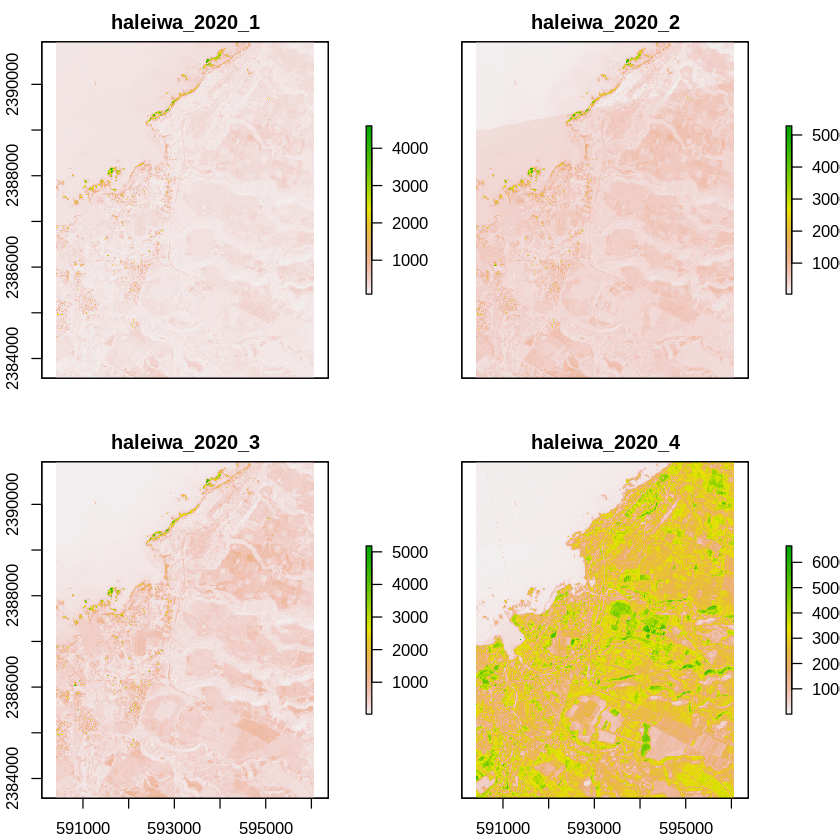

In [58]:
haleiwa_2020 %>% plot
haleiwa_2020

In [7]:
aoi_haleiwa <- st_read("/content/aoi/384-select-haleiwa.shp")
aoi_kahuku <- st_read("/content/aoi/384-select-kahuku.shp")
aoi_kawainui <- st_read("/content/aoi/384-select-kawainui.shp")
aoi_haleiwa
aoi_kahuku
aoi_kawainui

Reading layer `384-select-haleiwa' from data source 
  `/content/aoi/384-select-haleiwa.shp' using driver `ESRI Shapefile'
Simple feature collection with 42 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 590408.8 ymin: 2385106 xmax: 595016.9 ymax: 2390866
Projected CRS: NAD83 / UTM zone 4N
Reading layer `384-select-kahuku' from data source 
  `/content/aoi/384-select-kahuku.shp' using driver `ESRI Shapefile'
Simple feature collection with 48 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 603429.9 ymin: 2397672 xmax: 609190 ymax: 2400744
Projected CRS: NAD83 / UTM zone 4N
Reading layer `384-select-kawainui' from data source 
  `/content/aoi/384-select-kawainui.shp' using driver `ESRI Shapefile'
Simple feature collection with 60 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 627796.8 ymin: 2364068 xmax: 632020.8 ymax: 2368676
Projected CRS: NAD83 / UTM zone 4N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

fid,id,island,layer,geometry
<dbl>,<dbl>,<chr>,<chr>,<POLYGON [m]>
111,1,oahu,haleiwa,"POLYGON ((591176.8 2385106,..."
112,1,oahu,haleiwa,"POLYGON ((591560.8 2385106,..."
126,1,oahu,haleiwa,"POLYGON ((591176.8 2385490,..."
127,1,oahu,haleiwa,"POLYGON ((591560.8 2385490,..."
140,1,oahu,haleiwa,"POLYGON ((590792.8 2385874,..."
141,1,oahu,haleiwa,"POLYGON ((591176.8 2385874,..."
142,1,oahu,haleiwa,"POLYGON ((591560.8 2385874,..."
143,1,oahu,haleiwa,"POLYGON ((591944.8 2385874,..."
154,1,oahu,haleiwa,"POLYGON ((590408.8 2386258,..."


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

fid,id,island,layer,geometry
<dbl>,<dbl>,<chr>,<chr>,<POLYGON [m]>
742,1,oahu,kahuku,"POLYGON ((607653.9 2397672,..."
743,1,oahu,kahuku,"POLYGON ((608037.9 2397672,..."
759,1,oahu,kahuku,"POLYGON ((607269.9 2398056,..."
760,1,oahu,kahuku,"POLYGON ((607653.9 2398056,..."
761,1,oahu,kahuku,"POLYGON ((608037.9 2398056,..."
762,1,oahu,kahuku,"POLYGON ((608422 2398056, 6..."
776,1,oahu,kahuku,"POLYGON ((606885.9 2398440,..."
777,1,oahu,kahuku,"POLYGON ((607269.9 2398440,..."
778,1,oahu,kahuku,"POLYGON ((607653.9 2398440,..."


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

fid,id,island,layer,geometry
<dbl>,<dbl>,<chr>,<chr>,<POLYGON [m]>
1465,1,oahu,kawainui_marsh,"POLYGON ((627796.8 2364068,..."
1466,1,oahu,kawainui_marsh,"POLYGON ((628180.8 2364068,..."
1472,1,oahu,kawainui_marsh,"POLYGON ((630484.8 2364068,..."
1481,1,oahu,kawainui_marsh,"POLYGON ((627796.8 2364452,..."
1482,1,oahu,kawainui_marsh,"POLYGON ((628180.8 2364452,..."
1483,1,oahu,kawainui_marsh,"POLYGON ((628564.8 2364452,..."
1488,1,oahu,kawainui_marsh,"POLYGON ((630484.8 2364452,..."
1489,1,oahu,kawainui_marsh,"POLYGON ((630868.8 2364452,..."
1490,1,oahu,kawainui_marsh,"POLYGON ((631252.8 2364452,..."


In [76]:
# # Define the target CRS (using WGS 84 as an example)
target_crs <- CRS("+init=epsg:26904")


# # Reproject the raster
# haleiwa_2019_reprojected <- projectRaster(haleiwa_2019, crs = target_crs)
# Define the target extent and resolution based on the original raster
target_extent <- extent(haleiwa_2019)
target_res <- res(haleiwa_2019)
# Reproject the multi-band raster while preserving all bands
haleiwa_2019_reprojected <- stack()
for (i in 1:nlayers(haleiwa_2019)) {
  band <- projectRaster(haleiwa_2019[[i]], crs = target_crs, ext = target_extent, res = target_res)
  haleiwa_2019_reprojected <- addLayer(haleiwa_2019_reprojected, band)
}

# kahuku_2019_reprojected <- projectRaster(kahuku_2019, crs = target_crs)
target_extent <- extent(kahuku_2019)
target_res <- res(kahuku_2019)
kahuku_2019_reprojected <- stack()
for (i in 1:nlayers(kahuku_2019)) {
  band <- projectRaster(kahuku_2019[[i]], crs = target_crs, ext = target_extent, res = target_res)
  kahuku_2019_reprojected <- addLayer(kahuku_2019_reprojected, band)
}


# kawainui_2019_reprojected <- projectRaster(kawainui_2019, crs = target_crs)
target_extent <- extent(kawainui_2019)
target_res <- res(kawainui_2019)
kawainui_2019_reprojected <- stack()
for (i in 1:nlayers(kawainui_2019)) {
  band <- projectRaster(kawainui_2019[[i]], crs = target_crs, ext = target_extent, res = target_res)
  kawainui_2019_reprojected <- addLayer(kawainui_2019_reprojected, band)
}


# haleiwa_2020_reprojected <- projectRaster(haleiwa_2020, crs = target_crs)
target_extent <- extent(haleiwa_2020)
target_res <- res(haleiwa_2020)
haleiwa_2020_reprojected <- stack()
for (i in 1:nlayers(haleiwa_2020)) {
  band <- projectRaster(haleiwa_2020[[i]], crs = target_crs, ext = target_extent, res = target_res)
  haleiwa_2020_reprojected <- addLayer(haleiwa_2020_reprojected, band)
}


# kahuku_2020_reprojected <- projectRaster(kahuku_2020, crs = target_crs)
target_extent <- extent(kahuku_2020)
target_res <- res(kahuku_2020)
kahuku_2020_reprojected <- stack()
for (i in 1:nlayers(kahuku_2020)) {
  band <- projectRaster(kahuku_2020[[i]], crs = target_crs, ext = target_extent, res = target_res)
  kahuku_2020_reprojected <- addLayer(kahuku_2020_reprojected, band)
}


# kawainui_2020_reprojected <- projectRaster(kawainui_2020, crs = target_crs)target_extent <- extent(kawainui_2019)
target_res <- res(kawainui_2020)
kawainui_2020_reprojected <- stack()
for (i in 1:nlayers(kawainui_2020)) {
  band <- projectRaster(kawainui_2020[[i]], crs = target_crs, ext = target_extent, res = target_res)
  kawainui_2020_reprojected <- addLayer(kawainui_2020_reprojected, band)
}



In [73]:
dir.create("/content/imagery/planet/2019/reprojected")
dir.create("/content/imagery/planet/2020/reprojected")

In [78]:
# # Save the reprojected raster (optional)
writeRaster(haleiwa_2019_reprojected, "/content/imagery/planet/2019/reprojected/haleiwa_2019_reprojected.tif", format = "GTiff", overwrite=TRUE)
writeRaster(kahuku_2019_reprojected, "/content/imagery/planet/2019/reprojected/kahuku_2019_reprojected.tif", format = "GTiff")
writeRaster(kawainui_2019_reprojected, "/content/imagery/planet/2019/reprojected/kawainui_2019_reprojected.tif", format = "GTiff")


writeRaster(haleiwa_2020_reprojected, "/content/imagery/planet/2020/reprojected/haleiwa_2020_reprojected.tif", format = "GTiff")
writeRaster(kahuku_2020_reprojected, "/content/imagery/planet/2020/reprojected/kahuku_2020_reprojected.tif", format = "GTiff")
writeRaster(kawainui_2020_reprojected, "/content/imagery/planet/2020/reprojected/kawainui_2020_reprojected.tif", format = "GTiff")

In [89]:
haleiwa_2019_reprojected %>% st_crs

Coordinate Reference System:
  User input: NAD83 / UTM zone 4N 
  wkt:
PROJCRS["NAD83 / UTM zone 4N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-159,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False nor

In [80]:
# read reprojected 2019 rasters
haleiwa_2019 <- stack("/content/imagery/planet/2019/reprojected/haleiwa_2019_reprojected.tif") # +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs
kahuku_2019 <- stack("/content/imagery/planet/2019/reprojected/kahuku_2019_reprojected.tif") # +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs
kawainui_2019 <- stack("/content/imagery/planet/2019/reprojected/kawainui_2019_reprojected.tif") # +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs
haleiwa_2019
kahuku_2019
kawainui_2019

class      : RasterStack 
dimensions : 2464, 1894, 4666816, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 590393.6, 596075.6, 2383552, 2390944  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : haleiwa_2019_reprojected_1, haleiwa_2019_reprojected_2, haleiwa_2019_reprojected_3, haleiwa_2019_reprojected_4 
min values :                 102.000000,                   1.000000,                   1.041134,                  17.124163 
max values :                   5173.776,                   4311.933,                   6148.402,                   6859.063 


class      : RasterStack 
dimensions : 1532, 2241, 3433212, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 602645.7, 609368.7, 2397272, 2401868  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : kahuku_2019_reprojected_1, kahuku_2019_reprojected_2, kahuku_2019_reprojected_3, kahuku_2019_reprojected_4 
min values :                 0.9619721,                 0.9466243,                 0.9603951,                 0.9294125 
max values :                  5794.069,                  6060.545,                  6453.934,                  6662.757 


class      : RasterStack 
dimensions : 2300, 1993, 4583900, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 625859.8, 631838.8, 2361748, 2368648  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : kawainui_2019_reprojected_1, kawainui_2019_reprojected_2, kawainui_2019_reprojected_3, kawainui_2019_reprojected_4 
min values :                   4.6820717,                  55.1254578,                   0.9637939,                   1.0245723 
max values :                    5114.489,                    4430.690,                    6623.045,                    7125.570 


In [49]:
haleiwa_2019 %>% st_crs

Coordinate Reference System:
  User input: +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
  wkt:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6269]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8901]]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-159,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
      

In [82]:
# read reprojected 2020 rasters
haleiwa_2020 <- stack("/content/imagery/planet/2020/reprojected/haleiwa_2020_reprojected.tif") # +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs
kahuku_2020 <- stack("/content/imagery/planet/2020/reprojected/kahuku_2020_reprojected.tif") # +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs
kawainui_2020 <- stack("/content/imagery/planet/2020/reprojected/kawainui_2020_reprojected.tif") # +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs
haleiwa_2020
kahuku_2020
kawainui_2020

class      : RasterStack 
dimensions : 2464, 1894, 4666816, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 590393.6, 596075.6, 2383552, 2390944  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : haleiwa_2020_reprojected_1, haleiwa_2020_reprojected_2, haleiwa_2020_reprojected_3, haleiwa_2020_reprojected_4 
min values :                  92.037262,                  20.139996,                   2.088530,                   0.971824 
max values :                   6878.906,                   6547.140,                   8567.303,                   8403.496 


class      : RasterStack 
dimensions : 1532, 2241, 3433212, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 602645.7, 609368.7, 2397272, 2401868  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : kahuku_2020_reprojected_1, kahuku_2020_reprojected_2, kahuku_2020_reprojected_3, kahuku_2020_reprojected_4 
min values :                 89.948792,                  1.004660,                  1.004486,                  1.000000 
max values :                  6001.149,                  5767.799,                  7788.611,                  7791.575 


class      : RasterStack 
dimensions : 2300, 1993, 4583900, 4  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 625859.8, 631838.8, 2361748, 2368648  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : kawainui_2020_reprojected_1, kawainui_2020_reprojected_2, kawainui_2020_reprojected_3, kawainui_2020_reprojected_4 
min values :                   32.000000,                    7.373354,                    1.000000,                    1.000215 
max values :                    6403.312,                    4939.431,                    8612.448,                   17385.418 


In [102]:
# # Load necessary libraries
# library(sf)
# library(terra)
# library(raster)

# Set the working directory to where your files are located
# setwd("path/to/your/files")

# # Load the .tif file and the grid shapefile
# tif_file <- rast("your_file.tif") # haleiwa_2019
# grid_sf <- st_read("your_grid_shapefile.shp") # aoi_haleiwa


# Create an output directory for the clipped .tif files
output_dir <- "/content/kawainui_2020"
dir.create(output_dir, showWarnings = FALSE)

# Function to clip the .tif file with a single grid cell and save the result
clip_and_save <- function(grid_cell, tif, output_dir, id) {
  extent <- as(extent(grid_cell), "SpatialPolygons")
  crs(extent) <- crs(tif)
  clipped_tif <- crop(tif, extent)
  clipped_tif <- mask(clipped_tif, grid_cell)
  output_path <- file.path(output_dir, paste0("kawainui_2020_", id, ".tif"))
  writeRaster(clipped_tif, output_path, format="GTiff", overwrite=TRUE)
}

# Loop through each grid cell and clip the .tif file
for (i in 1:nrow(aoi_kawainui)) {
  grid_cell <- aoi_kawainui[i, ]
  clip_and_save(grid_cell, kawainui_2020, output_dir, i)
}

cat("Clipping complete! Check the output directory for the clipped .tif files.")


Clipping complete! Check the output directory for the clipped .tif files.

In [103]:
# Zip the output directory
zipfile <- "kawainui_2020.zip"
zip(zipfile, files = list.files(output_dir, full.names = TRUE))
cat("Zipping complete! The zipped file is", zipfile, "\n")

# Instructions for downloading the zipped file (assuming you are running this in an interactive session)
cat("To download the zipped file, please check your working directory.")

Zipping complete! The zipped file is kawainui_2020.zip 
To download the zipped file, please check your working directory.

In [101]:
drive_upload(media = "/content/kawainui_2019.zip", path = as_id("17RaRzlCwD7jjgTP0xtU-RBBYCZjGWsos"))
# https://drive.google.com/drive/folders/17RaRzlCwD7jjgTP0xtU-RBBYCZjGWsos?usp=drive_link

Local file:

• /content/kawainui_2019.zip

Uploaded into Drive file:

• kawainui_2019.zip <id: 1D3FR5ncuxFgZGSJ5G6N9SHT6j8_JbZMH>

With MIME type:

• application/zip



In [104]:
drive_upload(media = "/content/kawainui_2020.zip", path = as_id("1J3st_8k7WxIF3Lx8dOJnPuPpPR2B9m7j"))
# https://drive.google.com/drive/folders/1J3st_8k7WxIF3Lx8dOJnPuPpPR2B9m7j?usp=drive_link

Local file:

• /content/kawainui_2020.zip

Uploaded into Drive file:

• kawainui_2020.zip <id: 1t0nBESFBkGEDOr8lhC_sSlT1bQfSS48q>

With MIME type:

• application/zip



In [ ]:
zip(zipfile = "/content/ThreeYear_Lumahai_stacked.zip",
    files = c("/content/folder_stack/ThreeYears"))
drive_upload(media = "/content/ThreeYear_Lumahai_stacked.zip", path = as_id("1SKIvRlGDANvbKTn9hirNAy3ykcdhfxiO"))
# https://drive.google.com/drive/folders/1SKIvRlGDANvbKTn9hirNAy3ykcdhfxiO?usp=drive_link